## Introduction and Business problem

<b> Business Problem: </b> Evaluating the potential success of opening an Indian restaurant in Toronto, Canada 

Toronto is one of the most populous Canadian cities and is home to a large number of immigrants. As a result of this, it has diverse neighborhoods such as Greektown, Koreatown, Little Italy, and Little India. More than half of Indian immigrants in Canada reside in Toronto, and therefore there is a great demand for Indian food. 
Due to the this, starting an Indian restaurant can potentially be a great idea given that it will be profitable to the owner. Through the course of this capstone project, we will evaluate the business idea of opening an Indian restaurant. Through geospatial data analysis, we can analyze the neighborhoods in Toronto by looking at current data about the success of restaurants.


<b> This project is beneficial to a range of target audiences: </b>

<b> 1) Business owners who are thinking of opening a restaurant: </b>
<br>
This can be a detailed reference for anyone wishing the open an Indian restaurant and can help in decision making related to neighborhoods, ambience, and other geographical factors.

<b> 2) Data scientists and Business analysts: </b>
<br>
The variety of stages such as data cleaning, exploratory data analysis, and machine learning undertaken in this project can help other Data scientists who want to analyze the neighborhoods of Toronto. By using the conclusions and insights yielded in this project, the operations can be extended, and further analysis can also be performed. 

<b> 3) Indian residents of Toronto: </b>
<br>
Since the report focuses on Indian restaurants, the conclusion from this report can help Indians looking for eatery options in Toronto.  

## Data Sources

<b> 1)	Information on Toronto’s neighborhoods (Postal code, borough, name of neighborhood) </b>
<br>
https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1012118802

<b> 2)	Geographical coordinates of neighborhoods </b>
<br>
https://cocl.us/Geospatial_data%E2%80%9D

<b> 3)	Foursquare API - Information about venues in Toronto </b>
<br>
Collecting the name, category, latitude, and longitude to see existing venues present 
<br>
https://developer.foursquare.com/docs/

<b> 4)	Demographics of Toronto’s neighborhoods by ethnicity </b>
<br>
This dataset will give an insight into the distribution of Indians in Toronto and help identify neighborhoods where opening an Indian restaurant can attract most customers
<br>
https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity

In [60]:
import pandas as pd
import numpy as np
import wikipedia as wp
from bs4 import BeautifulSoup
import requests

In [61]:
urldata = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1012118802"
data_source = requests.get(urldata).text
soup = BeautifulSoup(data_source, 'xml')
table=soup.find('table')
col_names = ['Postalcode','Borough','Neighbourhood']
df = pd.DataFrame(columns = col_names)

In [62]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [63]:
df.head()

,Postalcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [64]:
#Processing cells which have been assigned a neighbourhood
#Make neighbourhood same as borough if not assinged one

df=df[df['Borough']!='Not assigned']

In [65]:
df.head()

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [66]:
temp=df.groupby('Postalcode')['Neighbourhood'].apply(lambda x: "%s" % ', '.join(x))
temp=temp.reset_index(drop=False)
temp.rename(columns={'Neighbourhood':'Neighbourhood_joined'},inplace=True)

In [67]:
df_merge = pd.merge(df, temp, on='Postalcode')
df_merge.drop(['Neighbourhood'],axis=1,inplace=True)
df_merge.drop_duplicates(inplace=True)
df_merge.rename(columns={'Neighbourhood_joined':'Neighbourhood'},inplace=True)
df_merge.head()
df_final = df_merge
df = df_final

In [68]:
df.shape

(103, 3)

In this step, I will use a .csv file called Geospatial_Coordinates.csv which contains the latitude and longitude for their respective postal codes of Toronto. By merging the dataframe with the one above, I will get the coordinates for each row which will help for further analysis

In [69]:
df_geo = pd.read_csv('Geospatial_Coordinates.csv')
df_geo.head()
df_geo.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geo_merged = pd.merge(df_geo, df, on='Postalcode')

In [70]:
geo_data=geo_merged[['Postalcode','Borough','Neighbourhood','Latitude','Longitude']]
toronto_data = geo_data
toronto_data.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [71]:
#Note: the final (merged) dataframe from this step is called 'geo_final'

In [72]:
page_pop = wp.page("Demographics of Toronto").html().encode("UTF-8")

To decide the best possible location for opening an Indian restaurant, we can identify neighborhoods with the greatest percentage of indian population by looking at the ethnic diversity of each neighborhood.

Thus, I scraped the wikipedia page for “Demographics of Toronto”. 
Note: There were 4 neighborhoods which have a prominent number of Indians. <br> Those are: <br>
<b>1) </b> Toronto and East York <br>
<b>2) </b> North York <br>
<b>3) </b> Scarborough <br>
<b>4) </b> Etobicoke and York

In [73]:
tey_df_pop = pd.read_html(page_pop, header = 0)[12]

tey_df_pop = tey_df_pop.rename(columns={'%':'Ethnic Origin 1 %', '%.1':'Ethnic Origin 2 %',
'%.2':'Ethnic Origin 3 %','%.3':'Ethnic Origin 4 %', '%.4':'Ethnic Origin 5 %', '%.5':'Ethnic Origin 6 %',
'%.6':'Ethnic Origin 7 %','%.7':'Ethnic Origin 8 %','%.8':'Ethnic Origin 9 %'})

tey_df_pop.head()

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 %,Ethnic Origin #2,Ethnic Origin 2 %,Ethnic Origin #3,Ethnic Origin 3 %,Ethnic Origin #4,Ethnic Origin 4 %,Ethnic Origin #5,Ethnic Origin 5 %,Ethnic Origin #6,Ethnic Origin 6 %,Ethnic Origin #7,Ethnic Origin 7 %,Ethnic Origin #8,Ethnic Origin 8 %,Ethnic Origin #9,Ethnic Origin 9 %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN


In [74]:
ny_df_pop = pd.read_html(page_pop, header = 0)[13] 

ny_df_pop = ny_df_pop.rename(columns={'%':'Ethnic Origin 1 %', '%.1':'Ethnic Origin 2 %',
'%.2':'Ethnic Origin 3 %','%.3':'Ethnic Origin 4 %', '%.4':'Ethnic Origin 5 %', '%.5':'Ethnic Origin 6 %',
'%.6':'Ethnic Origin 7 %','%.7':'Ethnic Origin 8 %'})

ny_df_pop.head()

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 %,Ethnic Origin #2,Ethnic Origin 2 %,Ethnic Origin #3,Ethnic Origin 3 %,Ethnic Origin #4,Ethnic Origin 4 %,Ethnic Origin #5,Ethnic Origin 5 %,Ethnic Origin #6,Ethnic Origin 6 %,Ethnic Origin #7,Ethnic Origin 7 %,Ethnic Origin #8,Ethnic Origin 8 %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
scar_df_pop = pd.read_html(page_pop, header = 0)[14]

scar_df_pop = scar_df_pop.rename(columns={'%':'Ethnic Origin 1 %', '%.1':'Ethnic Origin 2 %',
'%.2':'Ethnic Origin 3 %','%.3':'Ethnic Origin 4 %', '%.4':'Ethnic Origin 5 %', '%.5':'Ethnic Origin 6 %',
'%.6':'Ethnic Origin 7 %','%.7':'Ethnic Origin 8 %'})

scar_df_pop.head(100)

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 %,Ethnic Origin #2,Ethnic Origin 2 %,Ethnic Origin #3,Ethnic Origin 3 %,Ethnic Origin #4,Ethnic Origin 4 %,Ethnic Origin #5,Ethnic Origin 5 %,Ethnic Origin #6,Ethnic Origin 6 %,Ethnic Origin #7,Ethnic Origin 7 %,Ethnic Origin #8,Ethnic Origin 8 %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
ety_df_pop = pd.read_html(page_pop, header = 0)[15]

ety_df_pop = ety_df_pop.rename(columns={'%':'Ethnic Origin 1 %', '%.1':'Ethnic Origin 2 %',
'%.2':'Ethnic Origin 3 %','%.3':'Ethnic Origin 4 %', '%.4':'Ethnic Origin 5 %', '%.5':'Ethnic Origin 6 %',
'%.6':'Ethnic Origin 7 %','%.7':'Ethnic Origin 8 %'})

ety_df_pop.head(100)

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 %,Ethnic Origin #2,Ethnic Origin 2 %,Ethnic Origin #3,Ethnic Origin 3 %,Ethnic Origin #4,Ethnic Origin 4 %,Ethnic Origin #5,Ethnic Origin 5 %,Ethnic Origin #6,Ethnic Origin 6 %,Ethnic Origin #7,Ethnic Origin 7 %,Ethnic Origin #8,Ethnic Origin 8 %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extracting location data using FourSquare

In [77]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

In [78]:
CLIENT_ID = '3TLBXEHLJH4HCKYLA1SCV5QDGBABCRF1QJBD5ZPPXELRSIQY' # your Foursquare ID
CLIENT_SECRET = 'S5W4RWIMNZU1RHMWSLJRTY4CSW2344JVPWXI45SAP2YU54CZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [79]:
#Use geopy library to get the latitude and longitude values of New York City.

address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of Toronto are {}, {}.'.format(latitude, longitude))

Coordinates of Toronto are 43.6534817, -79.3839347.


In [80]:
radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()

In [81]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [82]:
import json
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-82-b95733169535>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,LUSH,Cosmetics Shop,43.653557,-79.380400
3,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
4,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684


In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [85]:
toronto_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4
Woodbine Heights,5,5,5,5,5,5


In [86]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Malvern, Rouge",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [87]:
print('Number of uniques categories: {} '.format(len(toronto_venues['Venue Category'].unique())))


Number of uniques categories: 256 


In [88]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head(10)

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Berczy Park,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.042553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Birch Cliff, Cliffside West",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Business reply mail Processing Centre, South C...",0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.0,0.0,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop            199
Café                    93
Sandwich Place          67
Pizza Place             53
Park                    52
                      ... 
Martial Arts School      1
Doner Restaurant         1
Hardware Store           1
Bed & Breakfast          1
Strip Club               1
Name: Venue Category, Length: 256, dtype: int64


In [90]:
# create map using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Relationship between Toronto neighbourhood and Indian Restaurant


In [91]:
ind_toronto_df = toronto_grouped[['Neighbourhood', 'Indian Restaurant']]
ind_toronto_df

,Neighbourhood,Indian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.043478
...,...,...
92,"Willowdale, Willowdale West",0.000000
93,Woburn,0.000000
94,Woodbine Heights,0.000000
95,York Mills West,0.000000


In [92]:
toronto_merged = pd.merge(toronto_data, ind_toronto_df, on='Neighbourhood')
toronto_merged

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Indian Restaurant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0
...,...,...,...,...,...,...
96,M9N,York,Weston,43.706876,-79.518188,0.0
97,M9P,Etobicoke,Westmount,43.696319,-79.532242,0.0
98,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,0.0
99,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,0.0


## Plotting

In [93]:
# Let's try Categorical plot 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

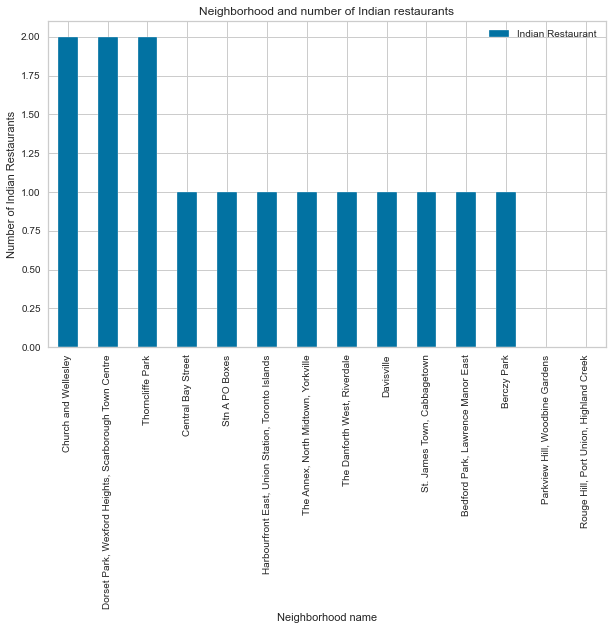

In [94]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighbourhood')['Indian Restaurant'].sum())
graph = graph.sort_values(by ='Indian Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhood name")
plt.ylabel("Number of Indian Restaurants")
plt.title("Neighborhood and number of Indian restaurants")
plt.show()

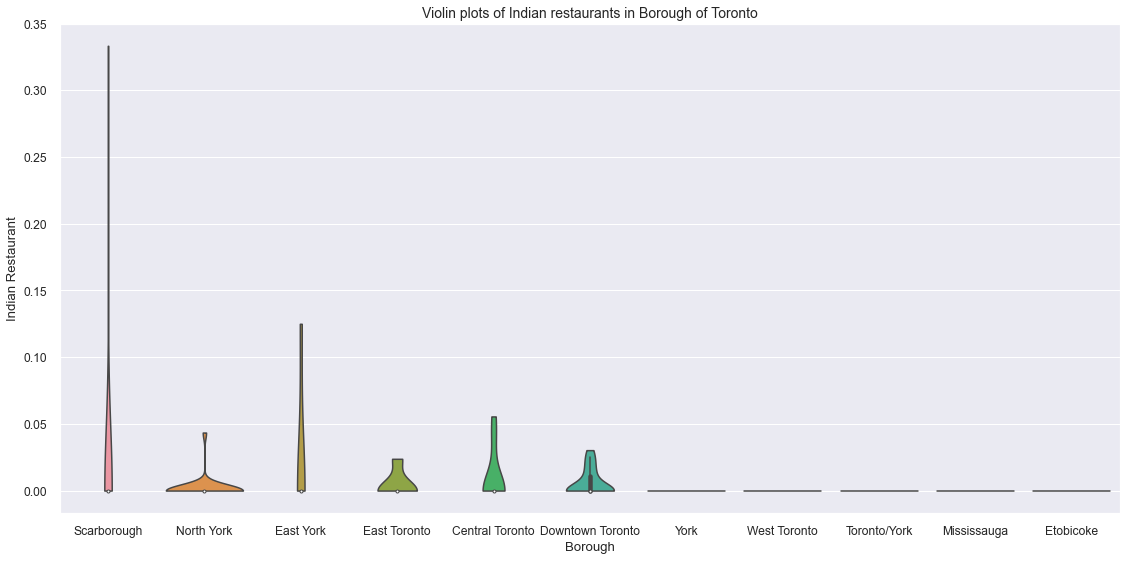

In [95]:
fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Indian Restaurant", x="Borough", data=toronto_merged, cut=0);

plt.title('Violin plots of Indian restaurants in Borough of Toronto', fontsize=14)
plt.show()

<b> Note: </b> In the previous section, I scarped ethinic diversity data for 4 different neighbourhoods and put it in 4 different dataframes. To analyse that data, I will now combine the 4 dataframes. 

In [96]:
#Appending the 4 dataframs and 
ET = ety_df_pop.append(tey_df_pop,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)

SN = ny_df_pop.append(scar_df_pop,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)

df_pop = SN.append(ET,sort=True).reset_index()

df_pop.drop('index',axis=1,inplace=True)
df_pop = df_pop[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 %','Ethnic Origin #2', 
'Ethnic Origin 2 %','Ethnic Origin #3','Ethnic Origin 3 %','Ethnic Origin #4', 
'Ethnic Origin 4 %','Ethnic Origin #5','Ethnic Origin 5 %', 'Ethnic Origin #6','Ethnic Origin 6 %','Ethnic Origin #7', 
'Ethnic Origin 7 %','Ethnic Origin #8', 'Ethnic Origin 8 %',
'Ethnic Origin #9','Ethnic Origin 9 %',]]

df_pop.head()

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 %,Ethnic Origin #2,Ethnic Origin 2 %,Ethnic Origin #3,Ethnic Origin 3 %,Ethnic Origin #4,Ethnic Origin 4 %,Ethnic Origin #5,Ethnic Origin 5 %,Ethnic Origin #6,Ethnic Origin 6 %,Ethnic Origin #7,Ethnic Origin 7 %,Ethnic Origin #8,Ethnic Origin 8 %,Ethnic Origin #9,Ethnic Origin 9 %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#Filtering the riding with Indian ethnic crowd
df_t = df_pop.loc[(df_pop['Ethnic Origin #1'] == 'East Indian')| 
(df_pop['Ethnic Origin #2'] == 'East Indian')| (df_pop['Ethnic Origin #3'] == 'East Indian')|
(df_pop['Ethnic Origin #4'] == 'East Indian')| (df_pop['Ethnic Origin #5'] == 'East Indian')|
(df_pop['Ethnic Origin #6'] == 'East Indian')|(df_pop['Ethnic Origin #7'] == 'East Indian')|
(df_pop['Ethnic Origin #8'] == 'East Indian')|(df_pop['Ethnic Origin #9'] == 'East Indian')]

df_indian = pd.DataFrame(df_t).reset_index()
df_indian.drop('index',axis=1,inplace=True)

df_indian

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 %,Ethnic Origin #2,Ethnic Origin 2 %,Ethnic Origin #3,Ethnic Origin 3 %,Ethnic Origin #4,Ethnic Origin 4 %,Ethnic Origin #5,Ethnic Origin 5 %,Ethnic Origin #6,Ethnic Origin 6 %,Ethnic Origin #7,Ethnic Origin 7 %,Ethnic Origin #8,Ethnic Origin 8 %,Ethnic Origin #9,Ethnic Origin 9 %
0,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN,NaN,NaN
3,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN,NaN,NaN
5,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0,NaN,NaN
7,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN,NaN,NaN
8,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
#Keeping only Indian ethinic percentages
columns_list = df_indian.columns.to_list()
df_indian_percent = pd.DataFrame()

#Deleting population and riding from names 
del columns_list[0]
del columns_list[0]


for i in range(0,df_indian.shape[0]):
    for j in columns_list:

        if df_indian.at[i, j] == 'East Indian':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            df_indian_percent = df_indian_percent.append({'Riding':df_indian.at[i, 'Riding'], 'Population':df_indian.at[i, 'Population']
                            , 'Ethnicity': df_indian.at[i, j], 'Percentage': df_indian.at[i, percent_col]},ignore_index=True)

df_indian_percent.head()

,Ethnicity,Percentage,Population,Riding
0,East Indian,7.3,109060.0,Don Valley North
1,East Indian,9.2,107725.0,Humber River-Black Creek
2,East Indian,10.6,93170.0,Don Valley East
3,East Indian,12.2,110450.0,Scarborough Centre
4,East Indian,8.2,108295.0,Scarborough Southwest


In [99]:
#Finding Indian population in numbers
df_indian_percent['Indian Population'] = (df_indian_percent['Percentage'] * df_indian_percent['Population'])/100
df_indian_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
df_indian_percent.drop_duplicates(keep='first',inplace=True) 

df_indian_percent

,Riding,Indian Population
0,Don Valley North,7961.380
1,Humber River-Black Creek,9910.700
2,Don Valley East,9876.020
3,Scarborough Centre,13474.900
4,Scarborough Southwest,8880.190
5,Scarborough-Agincourt,7712.650
6,Scarborough-Rouge Park,16941.315
7,Scarborough-Guildwood,18200.700
8,Scarborough North,11517.980
9,Etobicoke North,25965.120


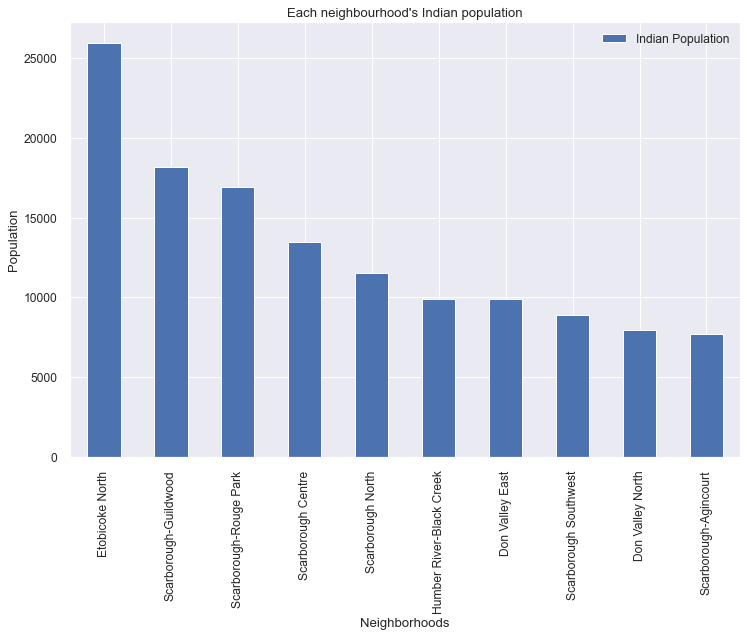

In [100]:
bar_graph = df_indian_percent.sort_values(by='Indian Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Indian Population',figsize=(12,8))
plt.title("Each neighbourhood's Indian population")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

Extracting the neighbourhood for each riding and merging it with the population numbers

In [101]:
riding_list = df_indian_percent['Riding'].to_list()
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list[riding_list.index('Scarborough North')] = 'Scarborough North (electoral district)'
riding_list

['Don Valley North',
 'Humber River-Black Creek',
 'Don Valley East',
 'Scarborough Centre (electoral district)',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Rouge Park',
 'Scarborough-Guildwood',
 'Scarborough North (electoral district)',
 'Etobicoke North']

In [102]:
import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighbourhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighbourhoods']]

In [103]:
pop_neigh = pd.merge(df_indian_percent, Riding_neighborhood_df, on='Riding')

pop_neigh.drop(columns=['Riding'],inplace =True)


In [104]:
pop_neigh['split_neighbourhoods'] = pop_neigh['Neighbourhoods'].str.split(',') 
pop_neigh.drop(columns=['Neighbourhoods'],inplace=True,axis=1)
pop_neigh = pop_neigh.split_neighbourhoods.apply(pd.Series).merge(pop_neigh, left_index = True, right_index = True).drop(["split_neighbourhoods"], axis = 1)\
                    .melt(id_vars = ['Indian Population'], value_name = "Neighbourhood").drop("variable", axis = 1).dropna()

pop_neigh.reset_index()
pop_neigh

,Indian Population,Neighbourhood
0,7961.380,Henry Farm
1,9910.700,Humber Summit
2,9876.020,Flemingdon Park
3,8880.190,Birch Cliff
4,7712.650,Steeles
5,16941.315,Morningside Heights
6,18200.700,Guildwood
7,25965.120,The Elms
8,7961.380,Bayview Village
9,9910.700,Humbermede


In [105]:
ind_toronto_df['split_neighbourhoods'] = ind_toronto_df['Neighbourhood'].str.split(',') 
ind_toronto_df.drop(columns=['Neighbourhood'],inplace=True,axis=1)
ind_toronto_df = ind_toronto_df.split_neighbourhoods.apply(pd.Series).merge(ind_toronto_df, left_index = True, right_index = True).drop(["split_neighbourhoods"], axis = 1)\
                    .melt(id_vars = ['Indian Restaurant'], value_name = "Neighbourhood").drop("variable", axis = 1).dropna()

ind_toronto_df.reset_index()
ind_toronto_df

<ipython-input-105-99cdad8106bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_toronto_df['split_neighbourhoods'] = ind_toronto_df['Neighbourhood'].str.split(',')
C:\Users\Veer Kejriwal\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Indian Restaurant,Neighbourhood
0,0.000000,Agincourt
1,0.000000,Alderwood
2,0.000000,Bathurst Manor
3,0.000000,Bayview Village
4,0.043478,Bedford Park
...,...,...
591,0.000000,Island airport
640,0.000000,Royal York South East
653,0.000000,Thistletown
737,0.000000,Kingsway Park South East


In [106]:
#Combinding neighbourhood with population number and indian restaurant
pop_merged_restaurant_percent = pd.merge(pop_neigh, ind_toronto_df, on='Neighbourhood')
pop_merged_restaurant_percent.head()

,Indian Population,Neighbourhood,Indian Restaurant
0,7961.380,Henry Farm,0.0
1,8880.190,Oakridge,0.0
2,16941.315,Rouge,0.0
3,16941.315,Port Union,0.0
4,18200.700,Morningside,0.0


For the predictive modelling, we will now use K-Means clustering

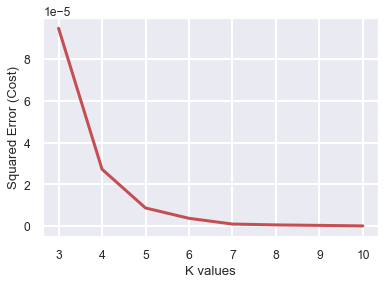

In [107]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


ind_toronto_df_cluster = ind_toronto_df.drop('Neighbourhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(ind_toronto_df_cluster)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

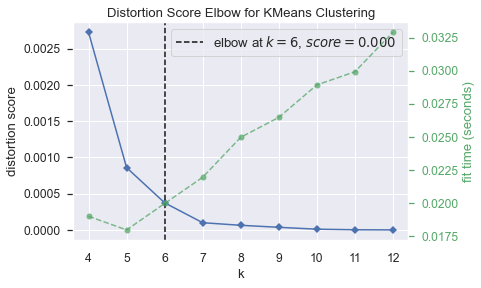

In [108]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(ind_toronto_df_cluster)
visualizer.show()      

In [109]:
no_clusters = 6

ind_toronto_df_cluster = ind_toronto_df.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=no_clusters, random_state=0).fit(ind_toronto_df_cluster)

kmeans.labels_

array([0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 4, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 5, 0, 0, 2, 0, 4, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
ind_toronto_df.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data
toronto_merged = toronto_merged.join(ind_toronto_df.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged.reset_index(drop=True, inplace=True)
toronto_merged['Cluster Labels'].astype(int)
toronto_merged.tail()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
34,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0,0.0
35,M7R,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,0.0,0.0
36,M9L,North York,Humber Summit,43.756303,-79.565963,0.0,0.0
37,M9N,York,Weston,43.706876,-79.518188,0.0,0.0
38,M9P,Etobicoke,Westmount,43.696319,-79.532242,0.0,0.0


In [111]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(no_clusters)
ys = [i + x + (i*x)**2 for i in range(no_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

Note: Red color signifies that it has the least number of indian restaurants

## Analysing the 6 clusters (0-5)

In [112]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0
1,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0
2,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,0.0
3,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.0,0.0
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,0.0,0.0
5,M2K,North York,Bayview Village,43.786947,-79.385975,0.0,0.0
6,M2P,North York,York Mills West,43.752758,-79.400049,0.0,0.0
7,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,0.0
8,M3B,North York,Don Mills,43.745906,-79.352188,0.0,0.0
9,M3C,North York,Don Mills,43.725900,-79.340923,0.0,0.0


In [113]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant


In [114]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant


In [115]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
18,M4H,East York,Thorncliffe Park,43.705369,-79.349372,3.0,0.125


In [116]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
22,M4S,Central Toronto,Davisville,43.704324,-79.388790,4.0,0.037037
24,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,4.0,0.030303
26,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4.0,0.025000
27,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4.0,0.021277


In [117]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
28,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,5.0,0.016129
30,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,5.0,0.011765
